In [39]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import json

In [40]:

data_dir = 'data_log'
subj = 'R2490'
data_log_dir = f"{data_dir}/{subj}"
json_files = glob.glob(os.path.join(data_log_dir, '*.json'))

# Initialize an empty list to store DataFrames
dataframes = []

# Iterate over each JSON file and read it into a DataFrame
for json_file in json_files:
    try:
        with open(json_file, 'r') as file:
            data = json.load(file)
            trial_data = data['trial_data']
            loc_data = data['locolizer_data']
        df = pd.json_normalize(trial_data)
        dataframes.append(df)
    except json.JSONDecodeError as e:
        print(f"Error reading file {json_file}: {e}")
if dataframes:
    combined_data = pd.concat(dataframes, ignore_index=True)
else:
    print("No valid JSON files found.")

In [41]:
# Function to calculate total time for each trial
def calculate_total_time(events):
    start_time = None
    done_time = None
    for event in events:
        if event['event'] == 'start':
            start_time = event['time']

        elif event['event'] == 'done':
            done_time = event['time']
            break  # Stop once we find the 'done' event
        elif event['event'] == 'timeout':
            done_time = event['time']
            print(f"Timeout at {done_time - start_time}")
            break  # Stop once we find the 'done' event
    
    if start_time is not None and done_time is not None:
        return done_time - start_time
    else:
        return None  # Return None if either start or done time is missing

def calculate_reveal(events):
    num_reveal = 1
    reveal_array = []
    num_white = 0
    num_red =1 
    for event in events:
        if event['event'] == 'reveal_white':
            num_white += 1
            num_reveal += 1
        elif event['event'] == 'reveal_red':
            num_red += 1
            num_reveal += 1
    return num_white, num_red, num_reveal

combined_data['num_white'], combined_data['num_red'], combined_data['num_reveal'] = zip(*combined_data['events'].apply(calculate_reveal))
# Apply the function to each row in the 'events' column
# Calculate total time and store it in 'total_t'
combined_data['total_t'] = combined_data['events'].apply(calculate_total_time)


Timeout at 29.108933988958597
Timeout at 29.10462831798941
Timeout at 29.104257825762033
Timeout at 29.081425891723484
Timeout at 29.104083609767258
Timeout at 29.125230980105698
Timeout at 29.081940481904894
Timeout at 29.090527737978846
Timeout at 29.129467703867704
Timeout at 29.090965182054788
Timeout at 29.087323701940477
Timeout at 29.114513957872987
Timeout at 29.118081745691597
Timeout at 29.08165486296639
Timeout at 29.09997219685465
Timeout at 29.122204510960728
Timeout at 29.115815525874496
Timeout at 29.118674758821726
Timeout at 29.110902895219624
Timeout at 29.089055821765214
Timeout at 29.102985558100045
Timeout at 29.14795365696773
Timeout at 29.10788707109168
Timeout at 29.085780752822757
Timeout at 29.13154545193538
Timeout at 29.10059519391507
Timeout at 29.131262430921197
Timeout at 29.097497881855816
Timeout at 29.097061208914965
Timeout at 29.126734297722578
Timeout at 29.103793499059975
Timeout at 29.1085222880356
Timeout at 29.128838576376438
Timeout at 29.15416

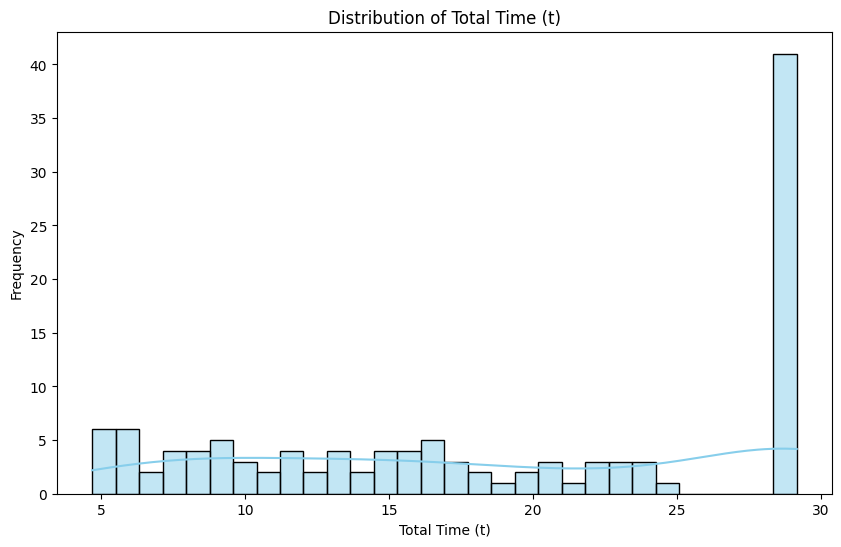

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop NaN values from 'total_t' for plotting
total_t_values = combined_data['total_t'].dropna()

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(total_t_values, bins=30, kde=True, color='skyblue')

# Add labels and title
plt.xlabel('Total Time (t)')
plt.ylabel('Frequency')
plt.title('Distribution of Total Time (t)')

# Show the plot
plt.show()

In [43]:
label_df = combined_data[['trial.rule']].copy()
label_df['trial_index'] = combined_data.index
label_df['t'] = combined_data['total_t']
label_df.to_csv(f'{data_dir}/{subj}/label.csv')
print(label_df)

    trial.rule  trial_index          t
0         tree            0  29.108934
1        chain            1  29.104628
2        chain            2  12.689874
3         loop            3  15.593756
4         loop            4  29.104258
..         ...          ...        ...
115       tree          115  29.122125
116       tree          116   8.795711
117      chain          117   8.094737
118       loop          118  29.113891
119      chain          119   7.429130

[120 rows x 3 columns]
